In [1]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv(r"dataset/iris.arff.csv", header=0)
# data.head(10)
# data.tail(10)
print(data.sample(10))
data["class"] = data["class"].map({"Iris-versicolor":0,"Iris-setosa":1,"Iris-virginica":2}) # 类别名称映射为数字
# data = data.drop("Id",axis=1)  # 删除列
print(len(data))
if data.duplicated().any(): # 重复值
    data.drop_duplicates(inplace=True) #删除重复值
    print(len(data))
data["class"].value_counts()  # 查看各个类别的鸢尾花记录

     sepallength  sepalwidth  petallength  petalwidth            class
91           6.1         3.0          4.6         1.4  Iris-versicolor
145          6.7         3.0          5.2         2.3   Iris-virginica
71           6.1         2.8          4.0         1.3  Iris-versicolor
3            4.6         3.1          1.5         0.2      Iris-setosa
143          6.8         3.2          5.9         2.3   Iris-virginica
104          6.5         3.0          5.8         2.2   Iris-virginica
33           5.5         4.2          1.4         0.2      Iris-setosa
114          5.8         2.8          5.1         2.4   Iris-virginica
11           4.8         3.4          1.6         0.2      Iris-setosa
149          5.9         3.0          5.1         1.8   Iris-virginica
150
147


0    50
2    49
1    48
Name: class, dtype: int64

In [5]:
class KNN:
    '''使用KNN实现K近邻算法实现分类'''
    def __init__(self, k):
        '''初始化
        
        Parameters
        -----
        k:int
            邻居个位数
        
        '''
        self.k = k
    def fit(self, X, y):
        '''训练
        
        Parameeters
        -----
        X: 类数组类型，可以是List也可以是Ndarray，形状为： [样本数量,特征数量]
        y: 类数组类型，形状为：[样本数量]
        
        '''
        self.X = np.asarray(X) #转换为ndarray类型
        self.y = np.asarray(y)
    def predict(self, X):
        '''对样本进行预测
        Parameters:
        X: 类数组类型，可以是List也可以是Ndarray，形状为： [样本数量,特征数量]
        Returns:
        数组类型，预测结果
        '''
        X = np.asarray(X)
        result = []
        for x in X:
            dis = np.sqrt(np.sum((x-self.X)**2, axis=1)) # 对于测试机的每隔一个样本，一次与训练集的所有数据求欧氏距离
            index = dis.argsort()# 返回排序结果的下标
            index = index[:self.k] # 截取前K个
            count = np.bincount(self.y[index]) # 返回数组中每个整数元素出现次数，元素必须是非负整数
            result.append(count.argmax()) # 返回ndarray中值最大的元素所对应的索引，就是出现次数最多的索引，也就是我们判定的类别
        return np.asarray(result)
    def predict2(self, X):
        '''对样本进行预测，加入权重计算
        Parameters:
        X: 类数组类型，可以是List也可以是Ndarray，形状为： [样本数量,特征数量]
        Returns:
        数组类型，预测结果
        '''
        X = np.asarray(X)
        result = []
        for x in X:
            dis = np.sqrt(np.sum((x-self.X)**2, axis=1)) # 对于测试机的每隔一个样本，一次与训练集的所有数据求欧氏距离
            index = dis.argsort()# 返回排序结果的下标
            index = index[:self.k] # 截取前K个
            count = np.bincount(self.y[index], weights=1/dis[index]) # 返回数组中每个整数元素出现次数，元素必须是非负整数
            result.append(count.argmax()) # 返回ndarray中值最大的元素所对应的索引，就是出现次数最多的索引，也就是我们判定的类别
        return np.asarray(result)

In [6]:

# 提取每个类中鸢尾花数据
t0 = data[data["class"]==0]
t1 = data[data["class"]==1]
t2 = data[data["class"]==2]
# 打乱# 打乱每个类别数据
t0 = t0.sample(len(t0), random_state=0)
t1 = t1.sample(len(t1), random_state=0)
t2 = t2.sample(len(t2), random_state=0)
# 分配训练集和数据集，axis=0表示按纵向方式拼接
train_X = pd.concat([t0.iloc[:40, :-1], t1.iloc[:40, :-1], t2.iloc[:40, :-1]], axis=0)
train_y = pd.concat([t0.iloc[:40, -1], t1.iloc[:40, -1], t2.iloc[:40, -1]], axis=0)
test_X = pd.concat([t0.iloc[40:, :-1], t1.iloc[40:, :-1], t2.iloc[40:, :-1]], axis=0)
test_y = pd.concat([t0.iloc[40:, -1], t1.iloc[40:, -1], t2.iloc[40:, -1]], axis=0)

In [7]:
print(train_X)

     sepallength  sepalwidth  petallength  petalwidth
78           6.0         2.9          4.5         1.5
61           5.9         3.0          4.2         1.5
60           5.0         2.0          3.5         1.0
91           6.1         3.0          4.6         1.4
52           6.9         3.1          4.9         1.5
..           ...         ...          ...         ...
144          6.7         3.3          5.7         2.5
124          6.7         3.3          5.7         2.1
106          4.9         2.5          4.5         1.7
123          6.3         2.7          4.9         1.8
136          6.3         3.4          5.6         2.4

[120 rows x 4 columns]


In [8]:
knn = KNN(k=3)
knn.fit(X=train_X, y=train_y)
result = knn.predict(test_X)
# display(test_y)
display(np.sum(result==test_y)/len(result))

0.9629629629629629

findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
/home/magicbook/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/magicbook/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 31867 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/magicbook/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 32467 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/magicbook/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26524 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
/home/magicbook/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: 

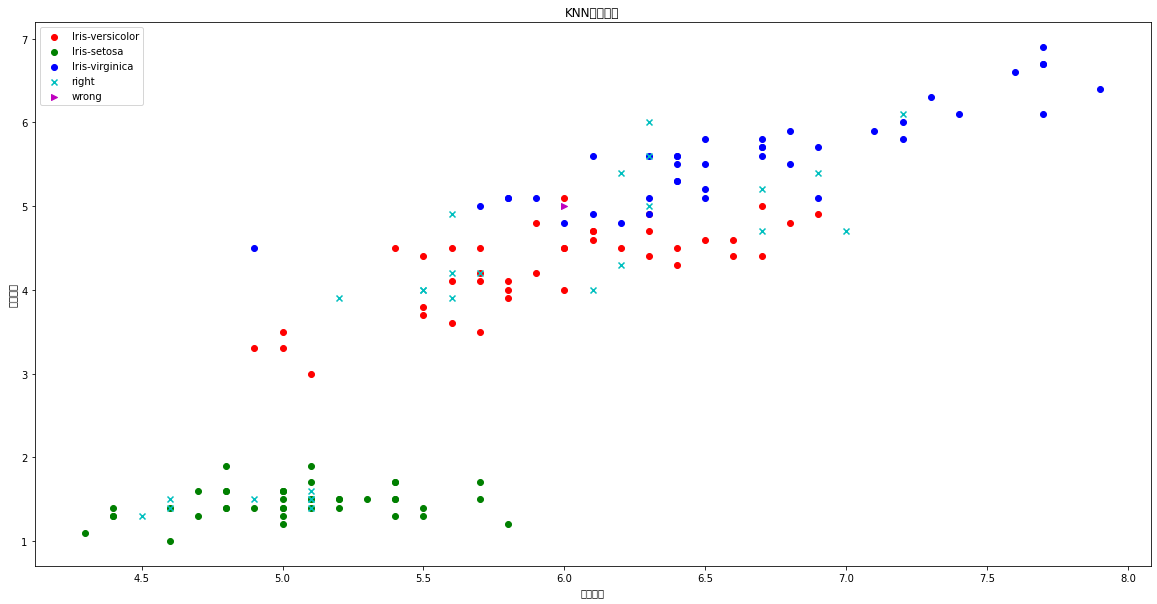

In [10]:
# "Iris-versicolor":0,"Iris-setosa":1,"Iris-virginica":2
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
mpl.rcParams["font.family"] = 'SimHei' # 默认mpl不支持中文，设置一下支持 
mpl.rcParams["axes.unicode_minus"] = False # 设置中文字体是可以正常显示负号
plt.scatter(x=t0["sepallength"][:40], y=t0["petallength"][:40], color='r', label="Iris-versicolor")
plt.scatter(x=t1["sepallength"][:40], y=t1["petallength"][:40], color='g', label="Iris-setosa")
plt.scatter(x=t2["sepallength"][:40], y=t2["petallength"][:40], color='b', label="Iris-virginica")
right = test_X[result == test_y]
wrong = test_X[result != test_y]
plt.scatter(x=right["sepallength"], y=right["petallength"], color='c', label="right", marker="x")
plt.scatter(x=wrong["sepallength"], y=wrong["petallength"], color='m', label="wrong", marker=">")
plt.xlabel('花萼长度')
plt.ylabel('花瓣长度')
plt.title('KNN分类结果')
plt.legend(loc='best')
plt.show()